In [1]:
from pathlib import Path
from rdkit import Chem, RDLogger

def add_nitrogen_charges(mol) -> Chem.Mol:
    RDLogger.DisableLog('rdApp.*')
    mol.UpdatePropertyCache(strict=False)
    ps = Chem.DetectChemistryProblems(mol)
    if not ps:
        Chem.SanitizeMol(mol)
        RDLogger.EnableLog('rdApp.*')
        return mol
    for p in ps:
        if p.GetType() == 'AtomValenceException':
            at = mol.GetAtomWithIdx(p.GetAtomIdx())
            if at.GetAtomicNum() == 7 and at.GetFormalCharge() <= 0: #and at.GetExplicitValence() == 4:
                at.SetFormalCharge(1)
    Chem.SanitizeMol(mol)
    RDLogger.EnableLog('rdApp.*')
    return mol

hitdex = {path.stem: add_nitrogen_charges(Chem.MolFromMolFile(str(path), sanitize=False)) for path in Path('mols').glob('*.mol')}

In [2]:
from fragmenstein import Victor, Igor
from arthorian_quest import QueryArthor
from fragmenstein import Laboratory, Wictor
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from arthorian_quest import get_custom_map, enquire
from pathlib import Path

Igor.init_pyrosetta()

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python311.ubuntu 2024.16+release.bc4dfa1b240a4138da057c7de791d08506956c8d 2024-04-16T10:39:11] retrieved from: http://www.pyrosetta.org


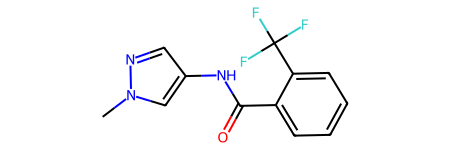

In [3]:
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Draw import IPythonConsole
Chem.MolFromSmiles(Chem.MolToSmiles(hitdex['x1098_0B']))

In [4]:
mol = hitdex['x1098_0B']
mol = Chem.MolFromMolFile('output/x1098self/x1098self.minimised.mol')
mol.SetProp('_Name', 'Z396117078')

mol2 = hitdex['x0404_0B']
mol2.SetProp('_Name', 'Z425338146')
info = {}

In [5]:
## Self scores

vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol])
vicky.place(Chem.MolToSmiles(mol), long_name='Z396117078self')
s = vicky.summarize()
info[vicky.long_name] = s
s

vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol2])
vicky.place(Chem.MolToSmiles(mol2), long_name='Z425338146self')
s = vicky.summarize()
info[vicky.long_name] = s
s

Z396117078self - Folder output/Z396117078self exists.
Z425338146self - Folder output/Z425338146self exists.


{'name': 'Z425338146self',
 'smiles': '[H]c1c([H])c(S(=O)(=O)C([H])([H])[H])c([H])c([H])c1N1C([H])([H])C([H])([H])[N+]([H])([H])C([H])([H])C1([H])[H]',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -6.6316192997220265,
 '∆G_bound': -6.433677189033818,
 '∆G_unbound': 0.1979421106882085,
 'comRMSD': 0.3613149536866358,
 'N_constrained_atoms': 16,
 'N_unconstrained_atoms': 0,
 'runtime': 742.13525223732,
 'regarded': ['Z425338146'],
 'disregarded': []}

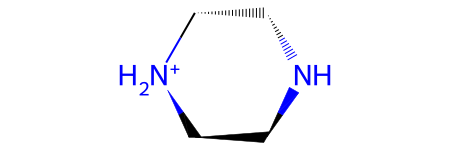

In [14]:
piperazine = fragmént(mol2)[1]
c = Chem.Mol(piperazine)
c.RemoveAllConformers()
c

In [15]:
# Z2451096209 is triflouoromethyl + piperidine

vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol, piperazine])
vicky.place('C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC=C2C(F)(F)F)C=N3', long_name='Z2451096209')
s = vicky.summarize()
info[vicky.long_name] = s
s

Z2451096209 - Folder output/Z2451096209 exists.


{'name': 'Z2451096209',
 'smiles': 'C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC=C2C(F)(F)F)C=N3',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -10.735105524794776,
 '∆G_bound': -7.829404389505018,
 '∆G_unbound': 2.9057011352897577,
 'comRMSD': 0.2669889393776454,
 'N_constrained_atoms': 24,
 'N_unconstrained_atoms': 0,
 'runtime': 52.69113206863403,
 'regarded': ['Z396117078', 'Z425338146S1'],
 'disregarded': []}

In [16]:
# Z2451096209 is no triflouoromethyl + piperidine

vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol, piperazine])
vicky.place('C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC=C2)C=N3', long_name='Z2451096235')
s = vicky.summarize()
info[vicky.long_name] = s
s

Z2451096235 - Folder output/Z2451096235 exists.


{'name': 'Z2451096235',
 'smiles': 'C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC=C2)C=N3',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -11.10656661449859,
 '∆G_bound': -9.141615579987576,
 '∆G_unbound': 1.9649510345110133,
 'comRMSD': 0.2935280671255753,
 'N_constrained_atoms': 20,
 'N_unconstrained_atoms': 0,
 'runtime': 58.81759595870972,
 'regarded': ['Z396117078', 'Z425338146S1'],
 'disregarded': []}

In [35]:
# Z3104214173 hydroxyl like x0852_0B

vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol, piperazine])
vicky.place('C1C[NH2+]C1CNCCC1N3C=C(NC(=O)C2=CC=CC(NC(=O)C)=C2)C=N3', long_name='Z3104214173')
s = vicky.summarize()
info[vicky.long_name] = s
s

{'name': 'Z3104214173',
 'smiles': 'C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=C(O)C(C)=C2)C=N3',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -10.476392067606824,
 '∆G_bound': -9.973342093713475,
 '∆G_unbound': 0.5030499738933486,
 'comRMSD': 0.4048982616321379,
 'N_constrained_atoms': 20,
 'N_unconstrained_atoms': 2,
 'runtime': 58.707159996032715,
 'regarded': ['Z396117078', 'Z425338146S1'],
 'disregarded': []}

In [47]:
# Z2451096380 amide like like x0852_0B

mol3 = hitdex['x0852_0B']
mol3.SetProp('_Name', 'x0852_0B')

vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol, piperazine])
vicky.place('C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC(NC(=O)C)=C2)C=N3', long_name='Z2451096380')
s = vicky.summarize()
info[vicky.long_name] = s
s

Z2451096380 - Folder output/Z2451096380 exists.


{'name': 'Z2451096380',
 'smiles': 'C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC(NC(=O)C)=C2)C=N3',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -11.633447934552159,
 '∆G_bound': -10.651137361562034,
 '∆G_unbound': 0.9823105729901255,
 'comRMSD': 0.3939028635451778,
 'N_constrained_atoms': 20,
 'N_unconstrained_atoms': 4,
 'runtime': 71.31955528259277,
 'regarded': ['Z396117078', 'Z425338146S1'],
 'disregarded': []}

In [43]:
# PV-004740099668 pyridine amide like like x0852_0B

vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol, piperazine, mol3])
vicky.place('C1C[NH2+]CCC1N4C=C(NC(=O)C3=CC=CC(NC(=O)C2=CC=CN=C2)=C3)C=N4', long_name='PV-004740099668')
s = vicky.summarize()
info[vicky.long_name] = s
s

PV-004740099668 - Folder output/PV-004740099668 exists.


{'name': 'PV-004740099668',
 'smiles': 'C1C[NH2+]CCC1N4C=C(NC(=O)C3=CC=CC(NC(=O)C2=CC=CN=C2)=C3)C=N4',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -11.658782045800223,
 '∆G_bound': -10.232059726943458,
 '∆G_unbound': 1.426722318856764,
 'comRMSD': 0.8182567521872338,
 'N_constrained_atoms': 25,
 'N_unconstrained_atoms': 4,
 'runtime': 103.98830771446228,
 'regarded': ['Z396117078', 'Z425338146S1', 'x0852_0B'],
 'disregarded': []}

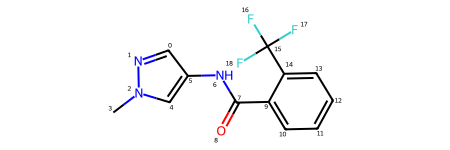

In [25]:
IPythonConsole.drawOptions.addAtomIndices = True

c = Chem.Mol(mol)
c.RemoveAllConformers()
c

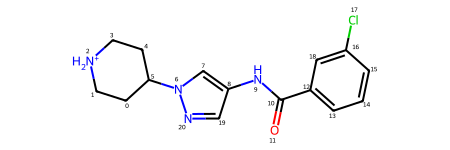

In [28]:
Chem.MolFromSmiles('C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC(Cl)=C2)C=N3')

In [30]:
# Z2451096211 is no triflouoromethyl + piperidine + chloro like x0101_0B

vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol, piperazine])
vicky.place('C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC(Cl)=C2)C=N3', long_name='Z2451096211', custom_map={'Z396117078': {11: 16}})
s = vicky.summarize()
info[vicky.long_name] = s
s

Z2451096211 - Folder output/Z2451096211 exists.


{'name': 'Z2451096211',
 'smiles': 'C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC(Cl)=C2)C=N3',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -8.048833534737156,
 '∆G_bound': -7.2861057309712685,
 '∆G_unbound': 0.7627278037658883,
 'comRMSD': 0.4228351164630084,
 'N_constrained_atoms': 20,
 'N_unconstrained_atoms': 1,
 'runtime': 57.58111619949341,
 'regarded': ['Z396117078', 'Z425338146S1'],
 'disregarded': []}

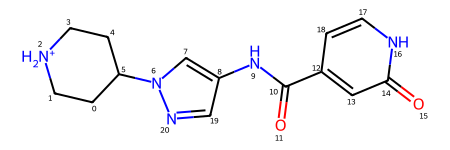

In [31]:
Chem.MolFromSmiles('C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC(=O)NC=C2)C=N3')

In [32]:
# pyridone

vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol, piperazine])
vicky.place('C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC(=O)NC=C2)C=N3', long_name='Z2451099201', custom_map={'Z396117078': {11: 14}})
s = vicky.summarize()
info[vicky.long_name] = s
s

Z2451099201 - Folder output/Z2451099201 exists.


{'name': 'Z2451099201',
 'smiles': 'C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC(=O)NC=C2)C=N3',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -6.610223002456301,
 '∆G_bound': -5.7797469313092,
 '∆G_unbound': 0.8304760711471013,
 'comRMSD': 0.29811576929904593,
 'N_constrained_atoms': 20,
 'N_unconstrained_atoms': 1,
 'runtime': 57.66392421722412,
 'regarded': ['Z396117078', 'Z425338146S1'],
 'disregarded': []}

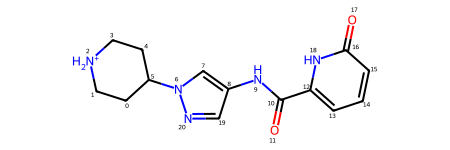

In [61]:
Chem.MolFromSmiles('C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC(=O)N2)C=N3')

In [65]:
# pyridone

vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol, piperazine])
vicky.place('C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC(=O)N2)C=N3', long_name='Z3104214179', custom_map={'Z396117078': {11: 16}})
s = vicky.summarize()
info[vicky.long_name] = s
s

{'name': 'Z3104214179',
 'smiles': 'C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC(=O)N2)C=N3',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -8.34506773074951,
 '∆G_bound': -6.868569848987082,
 '∆G_unbound': 1.4764978817624275,
 'comRMSD': 0.3014581428735372,
 'N_constrained_atoms': 20,
 'N_unconstrained_atoms': 1,
 'runtime': 48.23961329460144,
 'regarded': ['Z396117078', 'Z425338146S1'],
 'disregarded': []}

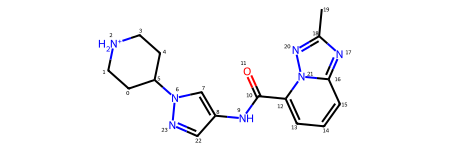

In [54]:
Chem.MolFromSmiles('C1C[NH2+]CCC1N4C=C(NC(=O)C3=CC=CC2=NC(C)=NN23)C=N4')

In [84]:
# Z4002297688 adding x0089_0B

mol3 = hitdex['x0089_0B']
mol3.SetProp('_Name', 'x0089_0B')

vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[merger, mol3])
vicky.place('C1C[NH2+]CCC1N4C=C(NC(=O)C3=CC=CC2=NC(C)=NN23)C=N4', long_name='Z4002297688', custom_map={'Z2451096211': {11: 11, 13: 21}})
s = vicky.summarize()
info[vicky.long_name] = s
s

Z4002297688 - Folder output/Z4002297688 exists.


{'name': 'Z4002297688',
 'smiles': 'C1C[NH2+]CCC1N4C=C(NC(=O)C3=CC=CC2=NC(C)=NN23)C=N4',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -9.050643159054687,
 '∆G_bound': -7.854016780387402,
 '∆G_unbound': 1.1966263786672842,
 'comRMSD': 0.5515712097423746,
 'N_constrained_atoms': 24,
 'N_unconstrained_atoms': 0,
 'runtime': 53.54659819602966,
 'regarded': ['Z2451096211', 'x0089_0B'],
 'disregarded': []}

In [99]:
import pandas as pd

df = pd.DataFrame(info).transpose().sort_values('∆∆G')
df['mol'] = df.index.to_series().apply(lambda key: Chem.MolFromMolFile(f'output/{key}/{key}.minimised.mol'))
df[['smiles', '∆∆G', 'comRMSD']].to_csv('manual_mergers.csv')
df

,name,smiles,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,N_unconstrained_atoms,runtime,regarded,disregarded,mol
PV-004740099668,PV-004740099668,C1C[NH2+]CCC1N4C=C(NC(=O)C3=CC=CC(NC(=O)C2=CC=...,,expansion,-11.658782,-10.23206,1.426722,0.818257,25,4,103.988308,"[Z396117078, Z425338146S1, x0852_0B]",[],<rdkit.Chem.rdchem.Mol object at 0x7facb846f300>
Z2451096380,Z2451096380,C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC(NC(=O)C)=C2)...,,expansion,-11.633448,-10.651137,0.982311,0.393903,20,4,71.319555,"[Z396117078, Z425338146S1]",[],<rdkit.Chem.rdchem.Mol object at 0x7facb846f450>
Z2451096235,Z2451096235,C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC=C2)C=N3,,expansion,-11.106567,-9.141616,1.964951,0.293528,20,0,58.817596,"[Z396117078, Z425338146S1]",[],<rdkit.Chem.rdchem.Mol object at 0x7facb846f370>
Z2451096209,Z2451096209,C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC=C2C(F)(F)F)C=N3,,expansion,-10.735106,-7.829404,2.905701,0.266989,24,0,52.691132,"[Z396117078, Z425338146S1]",[],<rdkit.Chem.rdchem.Mol object at 0x7facb846f3e0>
Z3104214173,Z3104214173,C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=C(O)C(C)=C2)C=N3,,expansion,-10.476392,-9.973342,0.50305,0.404898,20,2,58.70716,"[Z396117078, Z425338146S1]",[],<rdkit.Chem.rdchem.Mol object at 0x7facb846f530>
Z4002297688,Z4002297688,C1C[NH2+]CCC1N4C=C(NC(=O)C3=CC=CC2=NC(C)=NN23)...,,expansion,-9.050643,-7.854017,1.196626,0.551571,24,0,53.546598,"[Z2451096211, x0089_0B]",[],<rdkit.Chem.rdchem.Mol object at 0x7facb846f5a0>
Z3104214179,Z3104214179,C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC(=O)N2)C=N3,,expansion,-8.345068,-6.86857,1.476498,0.301458,20,1,48.239613,"[Z396117078, Z425338146S1]",[],<rdkit.Chem.rdchem.Mol object at 0x7facb846f610>
Z2451096211,Z2451096211,C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC(Cl)=C2)C=N3,,expansion,-8.048834,-7.286106,0.762728,0.422835,20,1,57.581116,"[Z396117078, Z425338146S1]",[],<rdkit.Chem.rdchem.Mol object at 0x7facb846f680>
Z396117078self,Z396117078self,Cn1cc(NC(=O)c2ccccc2C(F)(F)F)cn1,,expansion,-7.45485,-5.579956,1.874894,0.148814,19,0,41.009275,[Z396117078],[],<rdkit.Chem.rdchem.Mol object at 0x7facb846f760>
Z425338146self,Z425338146self,[H]c1c([H])c(S(=O)(=O)C([H])([H])[H])c([H])c([...,,expansion,-6.631619,-6.433677,0.197942,0.361315,16,0,742.135252,[Z425338146],[],<rdkit.Chem.rdchem.Mol object at 0x7facb846f7d0>


In [92]:
with Chem.SDWriter('elaborations.sdf') as sdfh:
    for zcode, row in df.iterrows():
        vc = row.mol
        vc.SetProp('_Name', zcode)
        vc.SetDoubleProp('dG', row['∆∆G'])
        sdfh.write(vc)

## Arthor

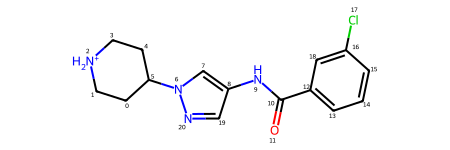

In [90]:
merger = df.loc['Z2451096211'].mol
copy = Chem.Mol(merger)
copy.RemoveAllConformers()
copy

In [82]:
from arthorian_quest import QueryArthor
from fragmenstein import Laboratory, Wictor

arthor = QueryArthor()

query: Chem.Mol = enquire(merger, { 2: 'N',
                                    13: 'a',
                                     14: 'a',
                                   17: '[Cl,F,Br,O]',
                               },
                          generic_arocarbons=True)
df1 = arthor.retrieve(Chem.MolToSmarts(query), ['real-database-22q1'])
print(df1)

from arthorian_quest import QueryArthor
from fragmenstein import Laboratory, Wictor

arthor = QueryArthor()

query: Chem.Mol = enquire(merger, {2: 'N',
                                    13: 'a',
                                     14: 'a',
                                   17: None,
                               },
                          generic_arocarbons=True)
df2 = arthor.retrieve(Chem.MolToSmarts(query), ['real-database-22q1'])
print(len(df2))

AttributeError: Can only use .str accessor with string values!

In [88]:
query: Chem.Mol = enquire(merger, {2: 'N',
                                    13: 'a',
                                     14: 'a',
                                   16: '[aX3H1,aX2H0]',
                                   17: None,
                               },
                          generic_arocarbons=True)
Chem.MolToSmarts(query)

'[C&H2]1-[C&H2]-N-[C&H2]-[C&H2]-[C&H1]-1-[n&H0]1:[a&H0&X2,a&H1&X3]:[a&H0](-[N&H1]-[C&H0](=[O&H0])-[a&H0]2:a:a:[a&H0&X2,a&H1&X3]:[a&X3&H1,a&X2&H0]:[a&H0&X2,a&H1&X3]:2):[a&H0&X2,a&H1&X3]:[n&H0]:1'

In [ ]:
from arthorian_quest import QueryArthor
from fragmenstein import Laboratory, Wictor

arthor = QueryArthor()

query: Chem.Mol = enquire(mol, {13: 'a',
                                     14: 'a',
                                     17: None,
                                1: '[CH1,CH0]',
                               },
                          generic_arocarbons=True)
df3 = arthor.retrieve(Chem.MolToSmarts(query), ['real-database-22q1'])
print(len(df3))

In [56]:
vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol])
vicky.place(Chem.MolToSmiles(mol), long_name='x1098self')
vicky.summarize()

{'name': 'x1098self',
 'smiles': '[H]c1nn(C([H])([H])[H])c([H])c1N([H])C(=O)c1c([H])c([H])c([H])c([H])c1C(F)(F)F',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -6.9533182528319735,
 '∆G_bound': -5.0919054355509825,
 '∆G_unbound': 1.8614128172809907,
 'comRMSD': 0.5028035453061303,
 'N_constrained_atoms': 19,
 'N_unconstrained_atoms': 0,
 'runtime': 34.16732120513916,
 'regarded': ['x1098_0B'],
 'disregarded': []}

In [92]:
mol = Chem.MolFromMolFile('output/Z2451096211proto/Z2451096211proto.minimised.mol')
mol.SetProp('_Name', 'Z2451096211')

In [78]:
vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol])
vicky.place('C1CNCCC1N3C=C(NC(=O)C2=CC=CC(Cl)=C2)C=N3', long_name='Z2451096211')
s = vicky.summarize()
info[vicky.long_name] = s
s

Z2451096211 - Folder output/Z2451096211 exists.


{'name': 'Z2451096211',
 'smiles': 'C1CNCCC1N3C=C(NC(=O)C2=CC=CC(Cl)=C2)C=N3',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -5.333930208936564,
 '∆G_bound': -4.815686239834494,
 '∆G_unbound': 0.51824396910207,
 'comRMSD': 0.3746825322856672,
 'N_constrained_atoms': 15,
 'N_unconstrained_atoms': 6,
 'runtime': 48.67688775062561,
 'regarded': ['Z396117078'],
 'disregarded': []}

In [79]:
vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol])
vicky.place(Chem.MolToSmiles(mol), long_name='Z396117078self')
s = vicky.summarize()
info[vicky.long_name] = s
s

{'name': 'Z396117078self',
 'smiles': 'Cn1cc(NC(=O)c2ccccc2C(F)(F)F)cn1',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -7.448656781873128,
 '∆G_bound': -5.587266225289788,
 '∆G_unbound': 1.86139055658334,
 'comRMSD': 0.16377214595123826,
 'N_constrained_atoms': 19,
 'N_unconstrained_atoms': 0,
 'runtime': 29.703835010528564,
 'regarded': ['Z396117078'],
 'disregarded': []}

In [80]:
vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol])
vicky.place('C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC(Cl)=C2)C=N3', long_name='Z2451096211proto')
s = vicky.summarize()
info[vicky.long_name] = s
s

Z2451096211proto - Folder output/Z2451096211proto exists.


{'name': 'Z2451096211proto',
 'smiles': 'C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC(Cl)=C2)C=N3',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -9.004153899642693,
 '∆G_bound': -7.729146759008993,
 '∆G_unbound': 1.2750071406337,
 'comRMSD': 0.32897302321011085,
 'N_constrained_atoms': 15,
 'N_unconstrained_atoms': 6,
 'runtime': 47.65024256706238,
 'regarded': ['Z396117078'],
 'disregarded': []}

Z2451096235proto - Folder output/Z2451096235proto exists.


{'name': 'Z2451096235proto',
 'smiles': 'C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC=C2)C=N3',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -9.45163366250529,
 '∆G_bound': -8.22275249040807,
 '∆G_unbound': 1.2288811720972206,
 'comRMSD': 0.2133527148933919,
 'N_constrained_atoms': 20,
 'N_unconstrained_atoms': 0,
 'runtime': 44.978108406066895,
 'regarded': ['Z2451096211'],
 'disregarded': []}

In [82]:
vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol])
vicky.place('C1CNCCC1N3C=C(NC(=O)C2=CC=CC=C2C(F)(F)F)C=N3', long_name='Z2451096209')
s = vicky.summarize()
info[vicky.long_name] = s
s

Z2451096209 - Folder output/Z2451096209 exists.


{'name': 'Z2451096209',
 'smiles': 'C1CNCCC1N3C=C(NC(=O)C2=CC=CC=C2C(F)(F)F)C=N3',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -6.487003760486267,
 '∆G_bound': -3.9742365687591037,
 '∆G_unbound': 2.5127671917271632,
 'comRMSD': 0.28461987577154657,
 'N_constrained_atoms': 19,
 'N_unconstrained_atoms': 5,
 'runtime': 49.723714113235474,
 'regarded': ['Z396117078'],
 'disregarded': []}

In [84]:
vicky = Victor(pdb_filename='/opt/xchem-fragalysis-2/mferla/ASAP/Zika/template2.pdb', hits=[mol])
vicky.place('C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC=C2C(F)(F)F)C=N3', long_name='Z2451096209proto')
s = vicky.summarize()
info[vicky.long_name] = s
s

Z2451096209proto - Folder output/Z2451096209proto exists.


{'name': 'Z2451096209proto',
 'smiles': 'C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC=C2C(F)(F)F)C=N3',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -8.892475124878796,
 '∆G_bound': -6.740203556359436,
 '∆G_unbound': 2.1522715685193607,
 'comRMSD': 0.14346483156068915,
 'N_constrained_atoms': 19,
 'N_unconstrained_atoms': 5,
 'runtime': 43.937198877334595,
 'regarded': ['Z396117078'],
 'disregarded': []}

Z2451099201proto - Folder output/Z2451099201proto exists.


{'name': 'Z2451099201proto',
 'smiles': 'C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC(=O)NC=C2)C=N3',
 'error': '',
 'mode': 'expansion',
 '∆∆G': -7.219869195024183,
 '∆G_bound': -5.6631011507789655,
 '∆G_unbound': 1.556768044245217,
 'comRMSD': 1.2883080420113475,
 'N_constrained_atoms': 16,
 'N_unconstrained_atoms': 5,
 'runtime': 48.992148637771606,
 'regarded': ['Z396117078'],
 'disregarded': []}

,name,smiles,error,mode,∆∆G,∆G_bound,∆G_unbound,comRMSD,N_constrained_atoms,N_unconstrained_atoms,runtime,regarded,disregarded
Z2451096235proto,Z2451096235proto,C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC=C2)C=N3,,expansion,-9.451634,-8.222752,1.228881,0.213353,20,0,44.978108,[Z2451096211],[]
Z2451096211proto,Z2451096211proto,C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC(Cl)=C2)C=N3,,expansion,-9.004154,-7.729147,1.275007,0.328973,15,6,47.650243,[Z396117078],[]
Z2451096209proto,Z2451096209proto,C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC=CC=C2C(F)(F)F)C=N3,,expansion,-8.892475,-6.740204,2.152272,0.143465,19,5,43.937199,[Z396117078],[]
Z396117078self,Z396117078self,Cn1cc(NC(=O)c2ccccc2C(F)(F)F)cn1,,expansion,-7.448657,-5.587266,1.861391,0.163772,19,0,29.703835,[Z396117078],[]
Z2451099201proto,Z2451099201proto,C1C[NH2+]CCC1N3C=C(NC(=O)C2=CC(=O)NC=C2)C=N3,,expansion,-7.219869,-5.663101,1.556768,1.288308,16,5,48.992149,[Z396117078],[]
Z2451096209,Z2451096209,C1CNCCC1N3C=C(NC(=O)C2=CC=CC=C2C(F)(F)F)C=N3,,expansion,-6.487004,-3.974237,2.512767,0.28462,19,5,49.723714,[Z396117078],[]
Z2451096211,Z2451096211,C1CNCCC1N3C=C(NC(=O)C2=CC=CC(Cl)=C2)C=N3,,expansion,-5.33393,-4.815686,0.518244,0.374683,15,6,48.676888,[Z396117078],[]


In [ ]:
Z2451099201proto

In [97]:
!export NAME=Z2451099201proto && cp output/$NAME/$NAME.minimised.mol $NAME.minimised.mol

In [62]:
IPythonConsole.drawOptions.addAtomIndices = True

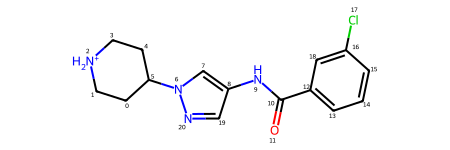

,idx,smiles_id,empty,something,db


,idx,smiles_id,empty,something,db


SyntaxError: unterminated string literal (detected at line 9) (679699286.py, line 9)

In [38]:
Chem.MolToSmiles(AllChem.RemoveHs(hitdex['x1098_0B']))

'Cn1cc(NC(=O)c2ccccc2C(F)(F)F)cn1'

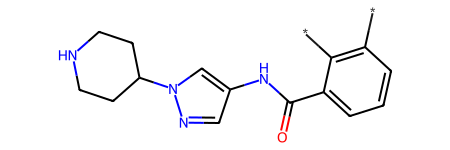

In [51]:
Chem.MolFromSmiles('C1CNCCC1N3C=C(NC(=O)C2=CC=CC(*)=C2*)C=N3')

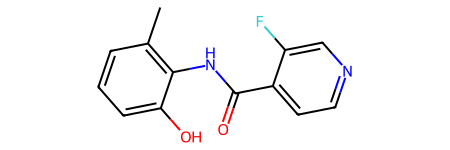

In [34]:
Z2451099201 C1CNCCC1N3C=C(NC(=O)C2=CC(=O)NC=C2)C=N3

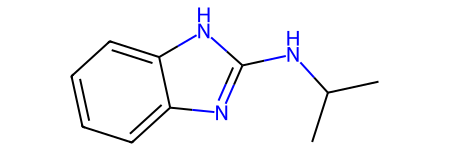

In [35]:
Chem.MolFromSmiles(Chem.MolToSmiles(hitdex['x0089_0B']))

In [ ]:
color turquoise, element C and polymer
color coral, element C and resn LIG
hide sticks, element H
hide sticks, resn DMS
hide sticks, polymer and not x1098_0B
hide cartoon, not x1098_0B
set_view (\
    -0.127688795,    0.879512548,    0.458403975,\
    -0.202552333,   -0.475567669,    0.856033385,\
     0.970898986,    0.016455201,    0.238873720,\
     0.000000000,    0.000000000,  -47.156284332,\
    -8.006793976,    5.435061932,  -14.852719307,\
    37.178375244,   57.134193420,  -20.000000000 )


NameError: name 'zcode2xcode' is not defined

In [ ]:
color mustard, element C and resn LIG and x1098_0B

[H]c1c([H])c([H])c2c(c1[H])N([H])C(=O)[C@@]1(C2([H])[H])C([H])([H])C([H])([H])C([H])([H])[N+]1([H])[H]


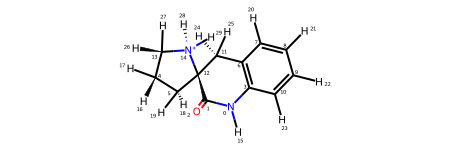

In [98]:
c = Chem.Mol(hitdex['x0229_0B'])
c.RemoveAllConformers()
print(Chem.MolToSmiles(c))
c

In [100]:
Chem.MolToSmiles(Chem.MolFromSmiles('[H]c1c([H])c(S(=O)(=O)C([H])([H])[H])c([H])c([H])c1N1C([H])([H])C([H])([H])[N+]([H])([H])C([H])([H])C1([H])[H]'))

'CS(=O)(=O)c1ccc(N2CC[NH2+]CC2)cc1'